In [1]:
import pandas as pd
import numpy as np
out=pd.read_csv("F:/Python projects/Bike parts Outliers/Bike_data.csv")
out.head()

,BikeNumber,Company,Make,Model,Type,Year,Desciption,Category,Quantity,Parts Out Date,Cost Per Part,Cost Of Parts Used,Month
0,1,Activa,Honda,Activa,Std,2012.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,4,21-Jun-19,4.0,16.0,19-Jun
1,2,Activa,Honda,Activa,3G,2015.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,10,21-Jun-19,4.0,40.0,19-Jun
2,3,Activa,Honda,Activa,Std,2012.0,10-Nut-Bolt-Big AllVehicles Local 10,10-Nut-Bolt-BigAllVehiclesLocal,1,20-Mar-19,10.0,10.0,19-Mar
3,4,Activa,Honda,Activa,Dlx,2013.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,4,21-Jun-19,4.0,16.0,19-Jun
4,5,Activa,Honda,Activa,Std,2011.0,10-Nut-Bolt-Big AllVehicles Local 10,10-Nut-Bolt-BigAllVehiclesLocal,10,20-Apr-19,10.0,100.0,19-Apr


In [9]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49640 entries, 0 to 49639
Data columns (total 14 columns):
BikeNumber            49640 non-null int64
Company               49640 non-null object
Make                  39330 non-null object
Model                 49640 non-null object
Type                  39239 non-null object
Year                  39330 non-null float64
Model.1               49624 non-null object
Desciption            49640 non-null object
Category              49640 non-null object
Quantity              49584 non-null object
Parts Out Date        49640 non-null object
Cost Per Part         48769 non-null float64
Cost Of Parts Used    48766 non-null float64
Month                 49640 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 5.3+ MB


In [2]:
out.dropna(subset=['Cost Per Part'],inplace=True)
out.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48769 entries, 0 to 49639
Data columns (total 13 columns):
BikeNumber            48769 non-null int64
Company               48769 non-null object
Make                  38673 non-null object
Model                 48769 non-null object
Type                  38584 non-null object
Year                  38673 non-null float64
Desciption            48769 non-null object
Category              48769 non-null object
Quantity              48723 non-null object
Parts Out Date        48769 non-null object
Cost Per Part         48769 non-null float64
Cost Of Parts Used    48756 non-null float64
Month                 48769 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 5.2+ MB


In [3]:
''''
creating a new column rownum to identify each row uniquely.
Originally Bike number was not unique in this dataset
As we can't show original bike number in dataset, so we replace bike number with unique numbers. '''

out['rownum']=np.arange(len(out))
out.head()

,BikeNumber,Company,Make,Model,Type,Year,Desciption,Category,Quantity,Parts Out Date,Cost Per Part,Cost Of Parts Used,Month,rownum
0,1,Activa,Honda,Activa,Std,2012.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,4,21-Jun-19,4.0,16.0,19-Jun,0
1,2,Activa,Honda,Activa,3G,2015.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,10,21-Jun-19,4.0,40.0,19-Jun,1
2,3,Activa,Honda,Activa,Std,2012.0,10-Nut-Bolt-Big AllVehicles Local 10,10-Nut-Bolt-BigAllVehiclesLocal,1,20-Mar-19,10.0,10.0,19-Mar,2
3,4,Activa,Honda,Activa,Dlx,2013.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,4,21-Jun-19,4.0,16.0,19-Jun,3
4,5,Activa,Honda,Activa,Std,2011.0,10-Nut-Bolt-Big AllVehicles Local 10,10-Nut-Bolt-BigAllVehiclesLocal,10,20-Apr-19,10.0,100.0,19-Apr,4


In [5]:
#Defining a function outlier to remove outliers from given dataset. This function accepts a dataframe and returns data without outliers
def outlier(grp):
    q1= grp['Cost Per Part'].quantile(0.25)
    q3= grp['Cost Per Part'].quantile(0.75)
    IQR=q3-q1
    fence_low  = q1-1.5*IQR
    fence_high = q3+1.5*IQR
    drop=grp['rownum'][(grp['Cost Per Part'] >= fence_low) & (grp['Cost Per Part'] <= fence_high)]
    a=drop.tolist()
    return a



In [6]:
dr=[]
df=out['Category'].unique()
for i in range(len(df)):
    group=out[out['Category']==df[i]] # sending data grouped by category to the function outlier
    a=outlier(group)
    dr= dr + a
    

In [7]:
clean=out[out['rownum'].isin(dr)]

In [8]:
clean.head()

,BikeNumber,Company,Make,Model,Type,Year,Desciption,Category,Quantity,Parts Out Date,Cost Per Part,Cost Of Parts Used,Month,rownum
0,1,Activa,Honda,Activa,Std,2012.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,4,21-Jun-19,4.0,16.0,19-Jun,0
1,2,Activa,Honda,Activa,3G,2015.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,10,21-Jun-19,4.0,40.0,19-Jun,1
2,3,Activa,Honda,Activa,Std,2012.0,10-Nut-Bolt-Big AllVehicles Local 10,10-Nut-Bolt-BigAllVehiclesLocal,1,20-Mar-19,10.0,10.0,19-Mar,2
3,4,Activa,Honda,Activa,Dlx,2013.0,10-Nut-Bolt-Big AllVehicles Local 4,10-Nut-Bolt-BigAllVehiclesLocal,4,21-Jun-19,4.0,16.0,19-Jun,3
4,5,Activa,Honda,Activa,Std,2011.0,10-Nut-Bolt-Big AllVehicles Local 10,10-Nut-Bolt-BigAllVehiclesLocal,10,20-Apr-19,10.0,100.0,19-Apr,4


In [18]:
df= clean.groupby('Category').agg({
    'Cost Of Parts Used': 'sum'
    })
df.sort_values('Cost Of Parts Used',ascending=False,inplace=True)
df.head()

,Cost Of Parts Used
Category,
Battery4LBLocal,301800.0
Engine-OilAllVehiclesHP,149340.0
Battery5LBLocal,106937.0
Clutch-ShoeActiva125-Aviator-Maestro-DuetASK,74895.0
Piston-50SplendorPlus-PassionPlus-PassionPro-SplendorPro-CD-HFDeluxe-iSmartGoetze,45809.0


In [36]:
df['cumulative sum']=df['Cost Of Parts Used'].cumsum()
df['Cumulative percentage']=df['cumulative sum']/(df['Cost Of Parts Used'].sum())*100

In [44]:
def ABC_Class(x):
    if x<=80:
        return "A"
    if x<=95:
        return "B"
    else:
        return "C"
df['Class']=df['Cumulative percentage'].apply(ABC_Class)
df.reset_index(inplace=True)

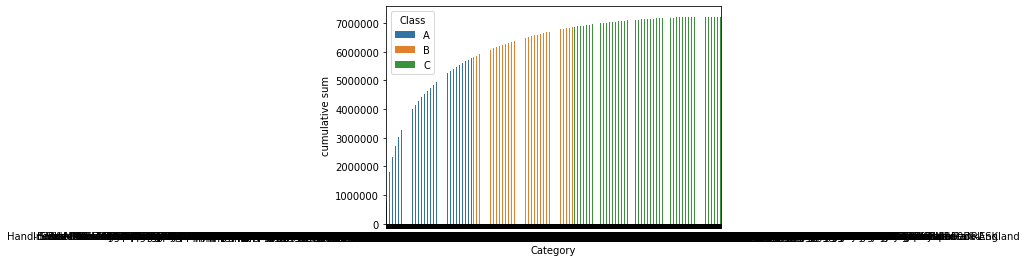

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.barplot(df['Category'],df['cumulative sum'],hue=df['Class'])
